In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

### define dataset

In [58]:
df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [59]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


### preprocessing

In [60]:
x_data, y_data = df["Year"].values, df["Value"].values

x_data.shape, y_data.shape

((55,), (55,))

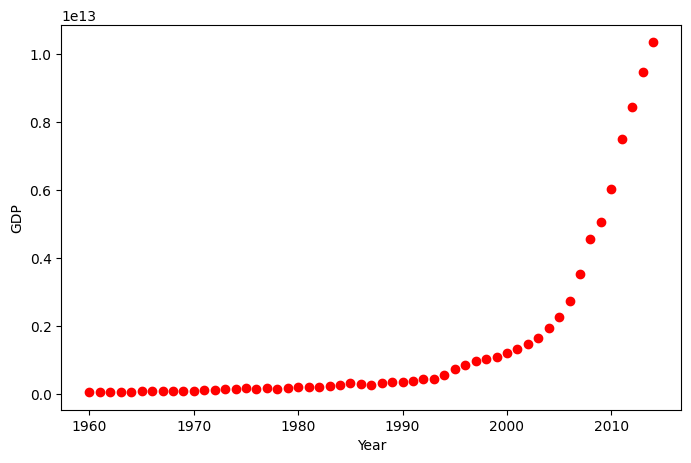

In [61]:
plt.figure(figsize=(8, 5))
plt.plot(x_data, y_data, "ro")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()

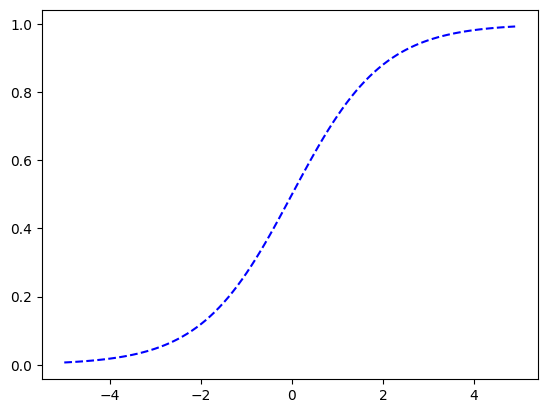

In [62]:
x = np.arange(-5.0, 5.0, 0.1)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y, "b--")
plt.show()

In [63]:
# split train and test data
msk = np.random.rand(len(df)) < 0.8

x_train, x_test = x_data[msk], x_data[~msk]
y_train, y_test = y_data[msk], y_data[~msk]

x_train.shape, x_test.shape

((45,), (10,))

In [64]:
# normalize
x_train = x_train / max(x_train)
y_train = y_train / max(y_train)

x_test = x_test / max(x_test)
y_test = y_test / max(y_test)

x_train[:3]

array([0.97318769, 0.97368421, 0.97418073])

### model definition

In [65]:
def sigmoid(x, a=1, b=1, Beta_1=1, Beta_2=0):
    y = a + (b / (1 + np.exp(-Beta_1 * (x - Beta_2))))
    return y

In [70]:
popt, pcov = curve_fit(sigmoid, x_train, y_train, p0=[0.0, 1.0, 20.0, 0.1], bounds=([0, 0, 0, 0], [1, 2.1, 440, 1]), maxfev=10000)

print(f"a : {popt[0]} | b : {popt[1]} | Beta_1 : {popt[2]} | Beta_2 : {popt[3]}")

a : 0.01550028098912646 | b : 1.967454447948237 | Beta_1 : 439.9999990681815 | Beta_2 : 0.9999999999999994


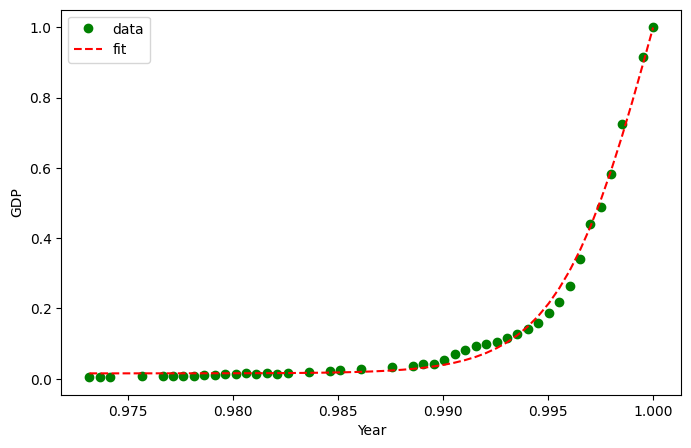

In [71]:
x = np.linspace(1960, 2014, 55)
x = x / max(x)
y = sigmoid(x, *popt)

plt.figure(figsize=(8, 5))
plt.plot(x_train, y_train, "go", label="data")
plt.plot(x, y, "r--", label="fit")
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()

### model evaluation

In [74]:
y_pred_test = sigmoid(x_test, *popt)

mse = np.mean((y_test - y_pred_test) ** 2)
mae = np.mean(np.absolute(y_test - y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print(f"mean squared error: {mse} | mean absolute error: {mae} | r2 score : {r2}".title())

Mean Squared Error: 8.201733532591088E-05 | Mean Absolute Error: 0.008223680449291887 | R2 Score : 0.9990450929770408
